# MNIST 손글씨 - Convolutional Neural Network Ver.4
- Conv2D 2 layers
- MaxPooling2D 1 layer
- Dropout 2 layers
- Padding 추가

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, X_test.shape, y_train.shape

((60000, 28, 28), (10000, 28, 28), (60000,))

In [ ]:
# 2차원 데이터(28x28)를 3차원으로(28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)

In [ ]:
# 0 ~ 1 사이의 값으로 정규화 
X_train = X_train / 255.0
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# X_test 에 대해서도 동일하게 처리
X_test = X_test.reshape(-1, 28, 28, 1)
X_test = X_test / 255.0
X_test.shape

(10000, 28, 28, 1)

In [ ]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

### 모델 정의, 설정, 학습

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os

In [ ]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3211520   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 모델 최적화
model_path = MODEL_DIR + 'best-mnist-cnn-v4.hdf5'
checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', 
                             verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(X_train, Y_train, validation_split=0.2,
                    epochs=50, batch_size=200, verbose=0,
                    callbacks=[checkpoint, early_stopping])


Epoch 00001: val_loss improved from inf to 0.06911, saving model to ./model/best-mnist-cnn-v4.hdf5

Epoch 00002: val_loss improved from 0.06911 to 0.04699, saving model to ./model/best-mnist-cnn-v4.hdf5

Epoch 00003: val_loss improved from 0.04699 to 0.04301, saving model to ./model/best-mnist-cnn-v4.hdf5

Epoch 00004: val_loss improved from 0.04301 to 0.03677, saving model to ./model/best-mnist-cnn-v4.hdf5

Epoch 00005: val_loss did not improve from 0.03677

Epoch 00006: val_loss improved from 0.03677 to 0.03528, saving model to ./model/best-mnist-cnn-v4.hdf5

Epoch 00007: val_loss did not improve from 0.03528

Epoch 00008: val_loss did not improve from 0.03528

Epoch 00009: val_loss improved from 0.03528 to 0.03420, saving model to ./model/best-mnist-cnn-v4.hdf5

Epoch 00010: val_loss did not improve from 0.03420

Epoch 00011: val_loss did not improve from 0.03420

Epoch 00012: val_loss did not improve from 0.03420

Epoch 00013: val_loss did not improve from 0.03420

Epoch 00014: va

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)

In [ ]:
# 정확도
acc = best_model.evaluate(X_test, Y_test)
print(f'정확도: {acc[1]:.4f}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.9917
정확도: 0.9917


### 훈련과정 시각화

In [ ]:
# 훈련셋과 검증셋의 오차
y_loss = history.history['loss']
y_vloss = history.history['val_loss']

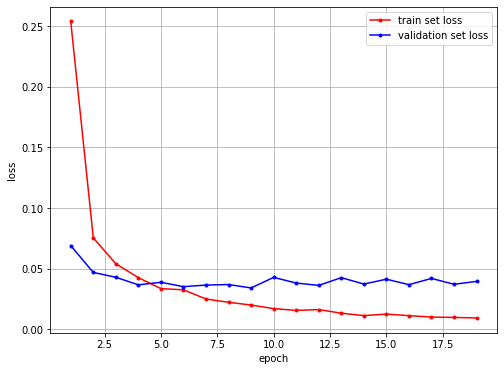

In [ ]:
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_loss, c='red', marker='.', label='train set loss')
plt.plot(x_len, y_vloss, c='blue', marker='.', label='validation set loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend()
plt.show()